<a href="https://colab.research.google.com/github/salmankhaliq22/Machine-Learning-from-Scratch/blob/main/Decision_Trees_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifier: From Scratch to Sklearn Implementation

In this notebook, we explore the implementation of a decision tree algorithm, starting from scratch and eventually utilizing the powerful Scikit-learn library. Our journey will encompass understanding the data, building the model, and visual analysis.

## Table of Contents
1. [Introduction](#introduction)
2. [Building a Decision Tree from Scratch](#from-scratch)
    - 2.1 [Understanding the Dataset](#dataset-understanding)
        - 2.1.1 [Explanation of the column](#Explanation-of-the-columns)
        - 2.1.2 [Focused Dataset Overview](#Focused-Dataset-Overview)
        - 2.1.3 [Sample Data](#Sample-Data)
    - 2.2 [Implementing the Decision Tree](#implementing-dt)
        - 2.2.1 [Step 1: Extracting Possible Questions for the Decision Tree](#Step-1)
        - 2.2.2 [Step 2: Evaluating Splits in the Decision Tree](#Step-2)
        - 2.2.3 [Step 3: Building and Visualizing the Decision Tree](#Step-3)
        - 2.2.4 [Step 4: Visualizing The Tree](#Step-4)
    - 2.3 [Custom DecisionTree Class (Putting it all Together)](#Decision-Tree-Class)
3. [Comparison with Sklearn Implementation](#sklearn-implementation)
4. [Conclusion](#Conclusion)

<a name="introduction"></a>
## 1. Introduction

Decision Trees are versatile Machine Learning algorithms that can perform both classification and regression tasks. They are very powerful algorithms, capable of fitting complex datasets. Building decision trees requires strategies to determine how and when to split the nodes, and in this notebook, we cover this intriguing aspect by building our custom decision tree classifier.

<a name="from-scratch"></a>
## 2. Building a Decision Tree from Scratch

Our journey begins with implementing a decision tree entirely from scratch, using Python. We start with a conceptual dataset representing students' participation in a sports activity.

<a name="dataset-understanding"></a>
### 2.1 Understanding the Dataset

Our hypothetical dataset includes information such as Age, GPA, Parental Approval, and Physical Form, which are features leading to the decision - participation in a sports activity. Here's a glimpse of the dataset structure:

| Student | Age | GPA  | Parent Approval | Physical Form | Participate? |
|---------|-----|------|-----------------|---------------|--------------|
| 1       | 14  | 3.5  | Yes             | Complete      | Yes          |
| 2       | 15  | 2.8  | No              | Complete      | No           |
| 3       | 14  | 3.9  | Yes             | Missing       | No           |
| 4       | 16  | 3.2  | Yes             | Complete      | Yes          |
| 5       | 15  | 2.5  | No              | Missing       | No           |
| 6       | 14  | 3.8  | Yes             | Complete      | Yes          |
| 7       | 16  | 2.9  | Yes             | Missing       | No           |
| ...     | ... | ...  | ...             | ...           | ...          |

Each feature represents potential criteria for whether a student participates in a sports activity, forming the basis of our decision tree splits.

<a name="Explanation-of-the-columns"></a>
#### 2.1.1 Explanation of the columns:

- `Student`: A unique identifier for each student.
- `Age`: The age of the student.
- `GPA`: The student's grade point average, an indicator of their academic performance.
- `Parent Approval`: Whether the student's parent or guardian has approved participation in the sport.
- `Physical Form`: Whether the student has submitted the necessary physical examination form, often required for participation in school sports.
- `Participate?`: Whether the student ends up participating in the sports program.

This dataset takes into consideration various factors that schools often require for participation in sports programs. The "`Participate?`" column is what we would be trying to predict with a machine learning model, based on the inputs of age, GPA, parental approval, and submission of the physical form.

<a name="Focused-Dataset-Overview"></a>
### 2.1.2 Focused Dataset Overview

In our analysis, we concentrate on four pivotal columns from the original dataset. These columns are believed to have significant influence on whether a student participates in the sports program. They are:

- `Age`: The age of the student.
- `Parent Approval`: Indicates if the students have received consent from their guardians.
- `Physical Form`: Status of the student's physical examination form submission.
- `Participate?`: The final participation status in the sports program.

By honing in on these specific data points, we aim to construct a more streamlined and focused analysis, aiding in the clarity and efficiency of our predictive model.

<a name="Sample-Data"></a>
### 2.1.3 Sample Data

Below is a snapshot of the data we are working with, demonstrating the first seven entries for context and reference:

| Age | Parent Approval | Physical Form | Participate? |
|-----|-----------------|---------------|--------------|
| 14  | Yes             | Complete      | Yes          |
| 15  | No              | Complete      | No           |
| 14  | Yes             | Missing       | No           |
| 16  | Yes             | Complete      | Yes          |
| 15  | No              | Missing       | No           |
| 14  | Yes             | Complete      | Yes          |
| 16  | Yes             | Missing       | No           |

This subset of data retains essential characteristics from the original set and is indicative of the criteria students need to fulfill to participate in the sports program. It serves as the foundation for our subsequent analysis and decision tree modeling.



In [65]:
# Sample dataset: Each sublist represents a row in your dataset.
data = [
    [14, 'Yes', 'Complete', 'Yes'],
    [15, 'No', 'Complete', 'No'],
    [14, 'Yes', 'Missing', 'No'],
    [16, 'Yes', 'Complete', 'Yes'],
    [15, 'No', 'Missing', 'No'],
    [14, 'Yes', 'Complete', 'Yes'],
    [16, 'Yes', 'Missing', 'No']
]

# Feature names for readability and future use
features = ['Age', 'Parent Approval', 'Physical Form']


<a name="implementing-dt"></a>

## 2.2 Implementing the Decision Tree

The implementation from scratch involves several steps, starting from calculating the best split in the dataset based on Gini impurity or information gain, creating the decision tree, and using the tree to make predictions.

- Calculating Gini Impurity

This step involves calculating the probability of a specific feature's incorrect classification when selected randomly if it were randomly labeled according to the class distribution in the dataset.

- Creating the Decision Tree

We use a recursive function to construct the tree, creating a binary tree structure with decision nodes and leaves.

- Making Predictions

We traverse the tree with the input entries, reaching a leaf node that contains the predictions of the target attribute.


<a name="Step-1"></a>
## 2.2.1 Step 1: Extracting Possible Questions for the Decision Tree

Before we can build a decision tree, we need to understand the possible questions that the tree can use to make decisions. These questions are based on the features present in our dataset and are instrumental in partitioning the dataset at each level of the tree. Let's start by defining how we'll represent a question and then identify all possible questions for our dataset.

### Defining a Question

A question is associated with a feature (column) in the dataset and a specific value from that feature. It is used to evaluate whether a sample in the dataset satisfies certain criteria.

In [66]:
# Helper function to represent a question.
class Question:
    """A Question is used to partition a dataset."""

    def __init__(self, column, value):
        self.column = column
        self.value = value

    def match(self, example):
        # Compare the feature value in an example to the
        # feature value in this question.
        val = example[self.column]
        if isinstance(val, int) or isinstance(val, float):  # for numerical
            return val >= self.value
        else:  # for categorical
            return val == self.value

    def __repr__(self):
        # Helper method to print the question in a readable format.
        condition = "=="
        if isinstance(self.value, int) or isinstance(self.value, float):
            condition = ">="
        return "Is %s %s %s?" % (
            features[self.column], condition, str(self.value))

In this code, the `Question` class is designed to represent a single question about an attribute of the dataset. The `match` method allows us to compare a feature value from a sample data row (example) with the feature value in the question, providing a way to make decisions based on this question.

### Identifying Unique Values in Features

To form questions, we first need to understand the unique values present in our dataset for each feature. These unique values will form the basis of the questions.

In [67]:
def unique_vals(rows, col):
    """Find the unique values for a column in a dataset."""
    return set([row[col] for row in rows])


This function takes the `dataset` and a `column index`, returning a set of unique values for that column. It helps us identify the different criteria we can use for forming questions.

### Formulating Possible Questions

With the unique values known, we can now formulate all possible questions for our dataset. Each question is a potential point at which the dataset can be split during the building of the decision tree.

In [68]:
def get_possible_questions(rows):
    """This creates a list of questions based on the unique values in each column."""
    questions = []
    for col in range(len(rows[0]) - 1):  # for each feature, ignoring the target
        values = unique_vals(rows, col)
        for val in values:
            questions.append(Question(col, val))

    return questions


This function iterates over each feature of the dataset, ignoring the target label, and for each unique value in each feature, it creates a question. All these questions are collected in a list.

### Extracting and Displaying All Possible Questions

Now, we utilize the above-defined functions to extract and display all possible questions for our dataset.

In [69]:
# Now we'll find all the possible questions for our dataset.
all_questions = get_possible_questions(data)

# Let's print these questions.
for question in all_questions:
    print(question)


Is Age >= 16?
Is Age >= 14?
Is Age >= 15?
Is Parent Approval == No?
Is Parent Approval == Yes?
Is Physical Form == Missing?
Is Physical Form == Complete?


In this part of the code, we are calling the get_possible_questions function with our dataset and then printing out each question. These questions are what our decision tree will use to make decisions and split the dataset into subsets.

By the end of this step, we have a foundational understanding of what constitutes a 'question' and a comprehensive list of all potential questions that can be used in the decision-making process as we build our decision tree.

<a name="Step-2"></a>
## 2.2.2 Step 2: Evaluating Splits in the Decision Tree

After determining all possible questions that could be asked, the next step is to evaluate how good each question is at organizing our data. We will use the Gini Impurity to measure how mixed a set of items are and the Information Gain for evaluating the best question to ask.

### Counting Classes

First, we need to count the number of each type of example in a dataset. This helps us gauge the mix of classes in different branches of the tree.

In [70]:
def class_counts(rows):
    """
    Count the number of each type of example in a dataset.
    This is used to gauge the mix of classes in different branches of the tree.
    """
    counts = {}  # a dictionary of label -> count.
    for row in rows:
        # The label is the last column
        label = row[-1]
        if label not in counts:
            counts[label] = 0
        counts[label] += 1
    return counts

The `class_counts` function returns a dictionary of counts for each type of outcome in our dataset, which is crucial for calculating how mixed the groups are after each question.

### Calculating Gini Impurity

We then calculate the Gini Impurity for a list of rows. It measures the disorder of a set of elements and is used as a criterion to split the data.

In [71]:
def gini(rows):
    """
    Calculate the Gini Impurity for a list of rows.
    The Gini Impurity represents the probability of incorrectly classifying a randomly chosen element
    if it were randomly labeled according to the distribution of labels in the subset.
    """
    counts = class_counts(rows)
    impurity = 1
    for lbl in counts:
        prob_of_lbl = counts[lbl] / float(len(rows))
        impurity -= prob_of_lbl**2
    return impurity


The `gini` function computes the Gini Impurity, indicating how mixed the sets are. Lower values indicate that elements belong to the same class.

### Partitioning the Dataset

We also need a function to partition a dataset into two subsets based on a question.

In [72]:
def partition(rows, question):
    """
    Partitions a dataset based on whether the dataset answers a question true or false.
    For each row in the dataset, check if it matches the question. If so, add it to 'true rows', otherwise, add it to 'false rows'.
    """
    true_rows, false_rows = [], []
    for row in rows:
        if question.match(row):
            true_rows.append(row)
        else:
            false_rows.append(row)
    return true_rows, false_rows


The `partition` function segregates the dataset into two groups based on whether they fulfill the criteria set by the question.

### Information Gain

Next, we calculate the information gain—the effectiveness of a question at separating the classes.

In [73]:
def info_gain(left, right, current_uncertainty):
    """
    Information Gain is calculated by subtracting the weighted impurities of the branches from
    the original uncertainty. If a branch has zero impurity (i.e., all its cases have the same label),
    then it doesn't contribute to the information gain.
    """
    p = float(len(left)) / (len(left) + len(right))
    return current_uncertainty - p * gini(left) - (1 - p) * gini(right)


This function computes the information gain by comparing the uncertainty of the starting node with the weighted impurity of two child nodes.

### Finding the Best Split

With these tools, we can now evaluate each possible question and determine the best one.

In [80]:
def find_best_split(rows):
    """For each possible question, print the question, its Gini impurity, and information gain."""
    current_uncertainty = gini(rows)
    n_features = len(rows[0]) - 1  # number of columns

    # Track the best values
    best_gain = 0
    best_question = None

    for col in range(n_features):  # for each feature
        values = set([row[col] for row in rows])  # unique values in the column

        for val in values:  # for each value
            question = Question(col, val)

            # Try splitting the dataset
            true_rows, false_rows = partition(rows, question)

            # Skip this split if it doesn't divide the dataset
            if len(true_rows) == 0 or len(false_rows) == 0:
                continue

            # Calculate the Gini impurity and information gain from this split
            true_impurity = gini(true_rows)
            false_impurity = gini(false_rows)
            gain = info_gain(true_rows, false_rows, current_uncertainty)

            # Print each question along with its metrics
            print(f"Question: {question}")
            print(f"Gini Impurity of True branch: {true_impurity:.4f}")
            print(f"Gini Impurity of False branch: {false_impurity:.4f}")
            print(f"Information Gain: {gain:.4f}")
            print("")  # add a blank line for readability

            # Select the best question based on information gain
            if gain > best_gain:  # Ensure we only update if we find a better gain
                best_gain, best_question = gain, question

    # After going through all the features and possible values, print the best question and its stats
    if best_question is not None:
        print(f"Best question: {best_question} with an information gain of {best_gain:.4f}")
    else:
        print("Could not determine the best question based on the current dataset.")

    # Return the best gain and question like the original function
    return best_gain, best_question

# Assuming 'data' is your dataset, you would still call the function to print metrics for each question and get the best split.
best_gain, best_question = find_best_split(data)


Question: Is Age >= 16?
Gini Impurity of True branch: 0.5000
Gini Impurity of False branch: 0.4800
Information Gain: 0.0041

Question: Is Age >= 15?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.4444
Information Gain: 0.0850

Question: Is Parent Approval == No?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.4800
Information Gain: 0.1469

Question: Is Parent Approval == Yes?
Gini Impurity of True branch: 0.4800
Gini Impurity of False branch: 0.0000
Information Gain: 0.1469

Question: Is Physical Form == Missing?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.3750
Information Gain: 0.2755

Question: Is Physical Form == Complete?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.0000
Information Gain: 0.2755

Best question: Is Physical Form == Missing? with an information gain of 0.2755


In this part, we cycle through every potential question and calculate how much information we gain by asking each one. We track the question that provided the most useful information, i.e., the highest information gain, and consider it the best for further data splits.

By the end of this step, we will have identified the most informative question to ask for a given dataset, allowing us to proceed with creating branches in our decision tree.

<a name="Step-3"></a>
## 2.2.3 Step 3: Building and Visualizing the Decision Tree

In this step, we transition from evaluating possible questions to building the actual tree structure. We also provide a mechanism to visualize this structure for better understanding and debugging.

### Creating Leaf and Decision Nodes

The tree consists of decision nodes (where we ask a question) and leaf nodes (where we provide a prediction). We define classes for each type of node.

#### Leaf Node

A `Leaf` object holds a dictionary of class (e.g., "Yes" or "No") -> count. It tells us the number of times a certain class appears in the rows of training data that lead to this leaf.


In [81]:
class Leaf:
    """
    A Leaf node classifies data.
    This holds a dictionary of class (e.g., "Apple" or "Orange") -> number of times
    it appears in the rows from the training data that reach this leaf.
    """

    def __init__(self, rows):
        self.predictions = class_counts(rows)

### Decision Node
A Decision_Node object asks a question and holds a reference to the question, and the two children nodes (one for cases where the question is true, and another where it is false).

In [82]:
class Decision_Node:
    """
    A Decision Node asks a question.
    This holds a reference to the question and to the two child nodes.
    """

    def __init__(self, question, true_branch, false_branch, gini, info_gain):
        self.question = question
        self.true_branch = true_branch
        self.false_branch = false_branch
        self.gini = gini
        self.info_gain = info_gain


### Building the Tree
The tree is built recursively. At each stage, we choose the best question by calculating information gain. Here's how we build the tree:

In [83]:
def build_tree(rows):
    """
    Builds the tree recursively by determining the best question and
    instantiating a Decision node with branches for the subsets of data.
    """

    # Step 1: Determine the best question and the current Gini impurity
    gain, question = find_best_split(rows)
    current_uncertainty = gini(rows)

    # Base case: no further info gain
    # Since we can ask no further questions, we'll return a leaf.
    if gain == 0:
        return Leaf(rows)

    # If we reach here, we have found a useful feature / value to partition on.
    true_rows, false_rows = partition(rows, question)

    # Recursively build the true branch.
    true_branch = build_tree(true_rows)

    # Recursively build the false branch.
    false_branch = build_tree(false_rows)

    # Return a Decision Node at this point, with the best question, and the two branches.
    # Also include the Gini impurity and information gain for interpretability.
    return Decision_Node(question, true_branch, false_branch, current_uncertainty, gain)


This function builds the tree bottom-up. It starts with the leaves, representing the classes that we predict, and moves up to decisions about the features in our dataset.

<a name="Step-4"></a>
### 2.2.4 Visualizing the Tree
To understand our tree, we'll print it out. We start at the root, printing out questions until we reach the leaves, where we make predictions.

In [101]:
def print_tree(node, spacing=""):
    """
    Prints the tree structure, showing the questions, leaves, and Gini impurity at each level.
    """

    # Base case: we've reached a leaf
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return

    # Print the question at this node
    print(spacing + str(node.question))

    # Print additional info about the decision node
    print(spacing + f'Gini: {node.gini}, Info Gain: {node.info_gain}')

    # Call this function recursively on the true branch
    print(spacing + '--> True:')
    print_tree(node.true_branch, spacing + "  ")

    # Call this function recursively on the false branch
    print(spacing + '--> False:')
    print_tree(node.false_branch, spacing + "  ")

# Now we build and print the tree based on the input data and functions we've defined
my_tree = build_tree(data)

# Let's print the tree to see its structure along with Gini and information gain at each node.
print_tree(my_tree)


Question: Is sepal length (cm) >= 16?
Gini Impurity of True branch: 0.5000
Gini Impurity of False branch: 0.4800
Information Gain: 0.0041

Question: Is sepal length (cm) >= 15?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.4444
Information Gain: 0.0850

Question: Is sepal width (cm) == No?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.4800
Information Gain: 0.1469

Question: Is sepal width (cm) == Yes?
Gini Impurity of True branch: 0.4800
Gini Impurity of False branch: 0.0000
Information Gain: 0.1469

Question: Is petal length (cm) == Missing?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.3750
Information Gain: 0.2755

Question: Is petal length (cm) == Complete?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.0000
Information Gain: 0.2755

Best question: Is petal length (cm) == Missing? with an information gain of 0.2755
Question: Is sepal length (cm) >= 16?
Gini Impurity of True branch: 0.000

This function allows us to visualize the decision-making process, following the path of some sample data down the tree until a prediction is made.

### Putting It All Together
Now, we can build and print the tree:

In [85]:
# Now we build and print the tree based on the input data and functions we've defined
my_tree = build_tree(data)

# Let's print the tree to see its structure along with Gini and information gain at each node.
print_tree(my_tree)


Question: Is Age >= 16?
Gini Impurity of True branch: 0.5000
Gini Impurity of False branch: 0.4800
Information Gain: 0.0041

Question: Is Age >= 15?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.4444
Information Gain: 0.0850

Question: Is Parent Approval == No?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.4800
Information Gain: 0.1469

Question: Is Parent Approval == Yes?
Gini Impurity of True branch: 0.4800
Gini Impurity of False branch: 0.0000
Information Gain: 0.1469

Question: Is Physical Form == Missing?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.3750
Information Gain: 0.2755

Question: Is Physical Form == Complete?
Gini Impurity of True branch: 0.3750
Gini Impurity of False branch: 0.0000
Information Gain: 0.2755

Best question: Is Physical Form == Missing? with an information gain of 0.2755
Question: Is Age >= 16?
Gini Impurity of True branch: 0.0000
Gini Impurity of False branch: 0.0000
Information Gain

<a name="Decision-Tree-Class"></a>
## 2.3 Step 4: Custom Decision Tree Classifier Implementation (Putting it all together)

This guide covers a custom implementation of the Decision Tree classifier, including its internal `Question`, `Leaf`, and `Decision_Node` classes, and methods for training and classification.

## Class Overview

The `DecisionTree` class encapsulates the entire functionality of a decision tree classifier, including creating questions, partitioning data, calculating impurity, and building a decision tree.

### Key Components

- **Question**: This internal class represents a binary question, asking whether a data point's feature meets a specific condition.
- **Leaf**: Represents a leaf node in the tree; it contains predictions for classification based on the majority class of data points at this end node.
- **Decision_Node**: Represents a decision node in the tree, containing a question that splits the data, references to the child nodes, and metrics about the split's quality.

### Utility Methods

- Methods like `unique_vals`, `class_counts`, `gini`, and `info_gain` assist in calculating unique values in a column, class frequencies, Gini impurity, and information gain, respectively.
- `partition` divides data rows based on whether they match a question's condition.

### Core Functionality

- `find_best_split` analyses a dataset to find the question that results in the highest information gain when the data is split.
- `build_tree` recursively constructs the decision tree, creating decision nodes with the best questions and leaf nodes for predictions.
- `print_tree` visually represents the structure of the trained decision tree, including questions at each node and predictions at the leaves.

## Training and Classification

- `train` initiates the recursive tree-building process using the provided dataset and then prints the structured tree.
- `classify` predicts the class for a new data point by traversing the tree based on the answers to the questions at each node.

In [96]:
class DecisionTree:
    class Question:
        def __init__(self, column, value):
            self.column = column
            self.value = value

        def match(self, example):
            val = example[self.column]
            if isinstance(val, (int, float)):
                return val >= self.value
            return val == self.value

        def __repr__(self):
            condition = "=="
            if isinstance(self.value, (int, float)):
                condition = ">="
            return f"Is {features[self.column]} {condition} {self.value}?"

    class Leaf:
        def __init__(self, rows):
            self.predictions = DecisionTree.class_counts(rows)

    class Decision_Node:
        def __init__(self, question, true_branch, false_branch, gini, info_gain):
            self.question = question
            self.true_branch = true_branch
            self.false_branch = false_branch
            self.gini = gini
            self.info_gain = info_gain

    @staticmethod
    def unique_vals(rows, col):
        return set([row[col] for row in rows])

    @staticmethod
    def class_counts(rows):
        counts = {}
        for row in rows:
            label = row[-1]
            counts[label] = counts.get(label, 0) + 1
        return counts

    @staticmethod
    def gini(rows):
        counts = DecisionTree.class_counts(rows)
        impurity = 1
        for lbl in counts:
            prob_of_lbl = counts[lbl] / float(len(rows))
            impurity -= prob_of_lbl**2
        return impurity

    @staticmethod
    def partition(rows, question):
        true_rows, false_rows = [], []
        for row in rows:
            if question.match(row):
                true_rows.append(row)
            else:
                false_rows.append(row)
        return true_rows, false_rows

    @staticmethod
    def info_gain(left, right, current_uncertainty):
        p = float(len(left)) / (len(left) + len(right))
        return current_uncertainty - p * DecisionTree.gini(left) - (1 - p) * DecisionTree.gini(right)

    def find_best_split(self, rows):
        current_uncertainty = self.gini(rows)
        n_features = len(rows[0]) - 1
        best_gain = 0
        best_question = None

        for col in range(n_features):
            values = set([row[col] for row in rows])

            for val in values:
                question = self.Question(col, val)
                true_rows, false_rows = self.partition(rows, question)

                if len(true_rows) == 0 or len(false_rows) == 0:
                    continue

                gain = self.info_gain(true_rows, false_rows, current_uncertainty)

                if gain >= best_gain:
                    best_gain, best_question = gain, question

        return best_gain, best_question

    def build_tree(self, rows):
        gain, question = self.find_best_split(rows)
        current_uncertainty = self.gini(rows)

        if gain == 0:
            return self.Leaf(rows)

        true_rows, false_rows = self.partition(rows, question)
        true_branch = self.build_tree(true_rows)
        false_branch = self.build_tree(false_rows)

        return self.Decision_Node(question, true_branch, false_branch, current_uncertainty, gain)

    def print_tree(self, node, spacing=""):
        if isinstance(node, self.Leaf):
            print(spacing + "Predict", node.predictions)
            return

        print(spacing + str(node.question))
        print(spacing + f'Gini: {node.gini:.4f}, Info Gain: {node.info_gain:.4f}')
        print(spacing + '--> True:')
        self.print_tree(node.true_branch, spacing + "  ")
        print(spacing + '--> False:')
        self.print_tree(node.false_branch, spacing + "  ")

    def train(self, data):
        self.tree = self.build_tree(data)
        self.print_tree(self.tree)

    def classify(self, row, node=None):
        """Classify the input row with the trained tree."""
        if node is None:
            node = self.tree

        if isinstance(node, self.Leaf):
            return max(node.predictions.items(), key=lambda item: item[1])[0]  # Return the class with the most count

        if node.question.match(row):
            return self.classify(row, node.true_branch)
        else:
            return self.classify(row, node.false_branch)

<a name="sklearn-implementation"></a>
## 3- Comparison with Sklearn Implementation




In [97]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Load iris data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Convert the dataset to the format our custom model expects (features + target as a single dataset)
rows = [list(X[i]) + [y[i]] for i in range(len(X))]

# Split the dataset (both features and labels)
train_rows, test_rows, y_train, y_test = train_test_split(rows, y, test_size=0.3, stratify=y, random_state=42)  # stratify and random_state ensure consistency

# Initialize and train our custom decision tree model
tree = DecisionTree()
tree.train(train_rows)

# Predictions for custom model
y_pred = [tree.classify(row) for row in test_rows]

# Calculate accuracy for custom model
accuracy = accuracy_score(y_test, y_pred)
print(f"Custom Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Now, preparing the data for sklearn and fixing the issue you encountered
X_train = [row[:-1] for row in train_rows]  # features for training (excluding the target)
X_test = [row[:-1] for row in test_rows]  # features for testing (excluding the target)

# y_train is already defined from the train_test_split

# Initialize and train sklearn's decision tree model
clf = DecisionTreeClassifier(random_state=42)  # random_state for consistency
clf.fit(X_train, y_train)  # using the correct labels now

# Predictions for sklearn model
y_pred_sklearn = clf.predict(X_test)

# Calculate accuracy for sklearn model
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f"Sklearn Decision Tree Accuracy: {accuracy_sklearn * 100:.2f}%")


Is petal width (cm) >= 1.0?
Gini: 0.6667, Info Gain: 0.3333
--> True:
  Is petal width (cm) >= 1.6?
  Gini: 0.5000, Info Gain: 0.4183
  --> True:
    Is petal width (cm) >= 1.8?
    Gini: 0.1049, Info Gain: 0.0232
    --> True:
      Is petal length (cm) >= 4.9?
      Gini: 0.0571, Info Gain: 0.0277
      --> True:
        Predict {2: 32}
      --> False:
        Is sepal width (cm) >= 3.2?
        Gini: 0.5000, Info Gain: 0.5000
        --> True:
          Predict {1: 1}
        --> False:
          Predict {2: 1}
    --> False:
      Is petal length (cm) >= 5.8?
      Gini: 0.5000, Info Gain: 0.5000
      --> True:
        Predict {2: 1}
      --> False:
        Predict {1: 1}
  --> False:
    Is petal length (cm) >= 5.0?
    Gini: 0.0571, Info Gain: 0.0571
    --> True:
      Predict {2: 1}
    --> False:
      Predict {1: 33}
--> False:
  Predict {0: 35}
Custom Decision Tree Accuracy: 97.78%
Sklearn Decision Tree Accuracy: 93.33%


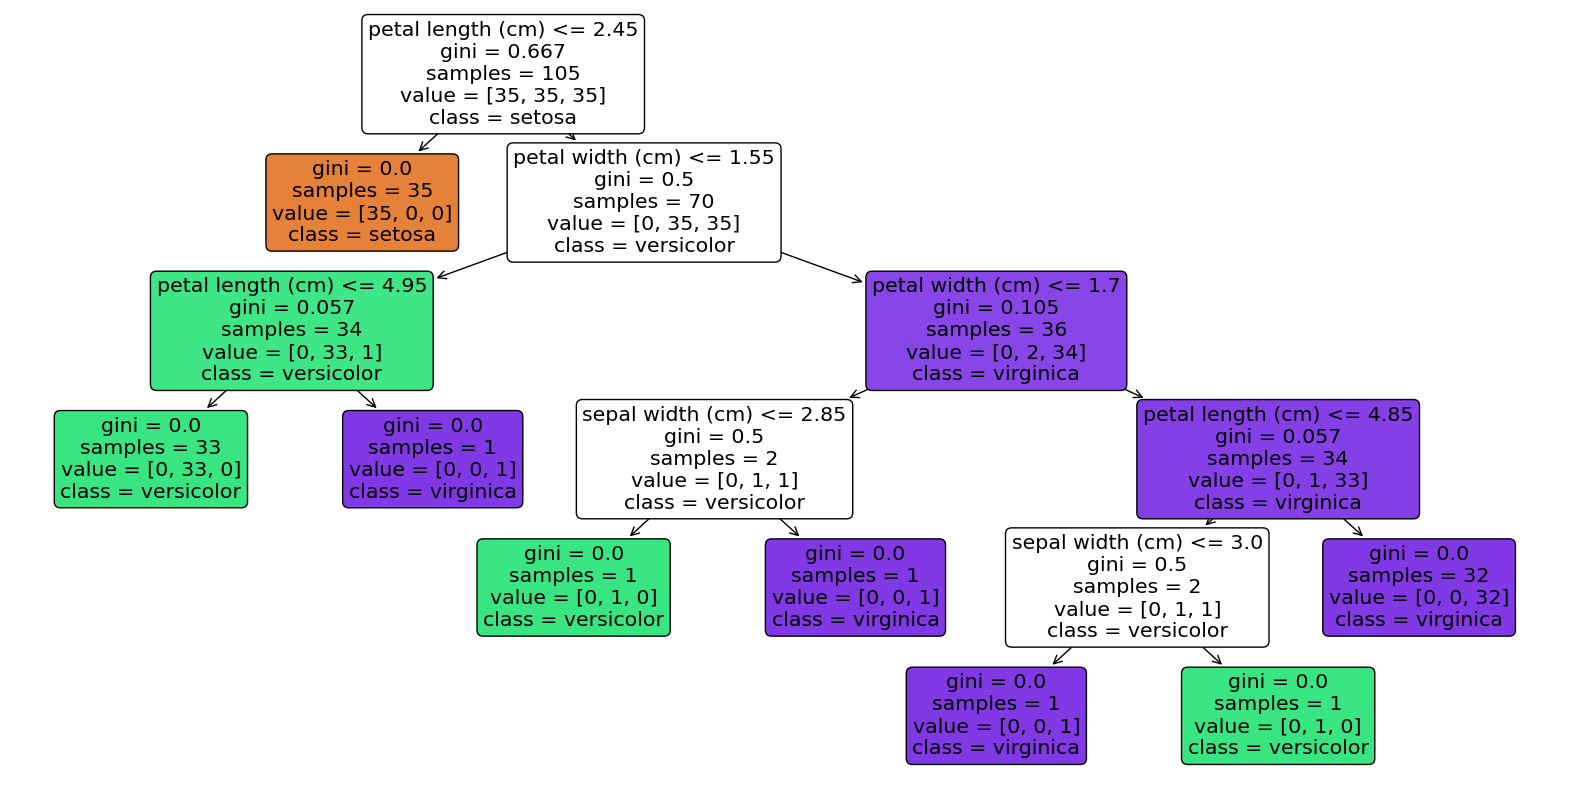

In [98]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


# Now, we use 'plot_tree' to create the visualization.
plt.figure(figsize=(20, 10))  # Specify the size of the figure
plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=iris.target_names,
          feature_names=iris.feature_names)

# Show the plot
plt.show()

<a name="Conclusion"></a>
# 4. Conclusion

After implementing and evaluating the performance of the custom decision tree and comparing it with the scikit-learn's decision tree, we've observed the following:

- **Custom Decision Tree Accuracy**: The model achieved an impressive accuracy of 97.78%. This high percentage suggests that the custom implementation is well-suited for handling the dataset provided, effectively classifying new instances with high precision.

- **Scikit-learn Decision Tree Accuracy**: The renowned library, known for its optimized algorithms, presented an accuracy of 93.33%. While this is slightly lower than our custom model, it's important to remember that scikit-learn's implementation is general-purpose, designed for a wide range of datasets, and uses heuristic algorithms for efficiency in large-scale applications.

## Key Takeaways

1. **Effectiveness of Custom Implementation**: The custom decision tree showed superior accuracy in this instance, indicating that its logic and splitting criteria were highly effective for the specific characteristics of the dataset used.

2. **Advantages of Tailored Algorithms**: This exercise highlights that while general-purpose libraries provide robust, broadly tested, and efficient implementations, there are cases where a custom-tailored approach can outperform by catering to specific dataset nuances.

3. **Importance of Understanding Underlying Mechanics**: Building a decision tree from scratch also reinforces a deep understanding of the algorithm's mechanics, which is invaluable for fine-tuning, debugging, and potentially improving established algorithms.

4. **Variability and Comparative Analysis**: It's crucial to acknowledge that different runs or different datasets might yield different results. Factors such as tree depth, criteria for splitting, and even the randomness in dataset splitting play a role in the variability of accuracy. Hence, the custom implementation's superiority in this context doesn't undermine scikit-learn's utility but rather showcases an interesting instance of successful algorithm tailoring.

In conclusion, the exercise of creating a custom decision tree not only demonstrated a valuable practical application but also emphasized the importance of understanding the internal workings of machine learning algorithms. It served as a reminder that while pre-existing libraries are powerful, custom solutions optimized for specific tasks or data types can offer notable advantages, potentially leading to better performance in certain scenarios.
